#Problem#2 : Gender Recognizer with Bangla Hand Written Digits 
Applying only **logistic** regression for the **Ekush** dataset and building a **binary classification** model that can predict male/female from Bengali handwritten digits with different hyperparameter settings.

##Logistic Regression for binary-class classification:
**Logistic** regression is a very popular machine learning technique. Logistic regression is used when the dependent variable is categorical.
The **goal** of logistic regression is to minimize the error between its
predictions and training data. 

If given x feature vector,

$\;\;\;Y=P(y=1|x), \;where\; 0<=Y<=1$

Logistic regression uses a **sigmoid** function to predict the output. The sigmoid function returns a value from 0 to 1.

$\;\;\;s=\sigma (w^Tx+b)=\sigma(z)=\frac{1}{1+e^{-z}}$


Here, we are implementing Gender Recognizer with Bangla Handwritten Digits using logistic regression. For this, we need image as input and we have 2 classes (male  or female) as output. So, we are implementig binary-class classification.

##Dataset: 
**Ekush** is a Multipurpose and Multitype Comprehensive Database for Online Off-line Bangla Handwritten Characters. Ekush has several features. One of them is to recognize gender using handwritten bangla digits.

- **input dimension:**
  - Size of an image: $28 \times 28 = 744$
- **output dimension: 2**
  - Class will be male or female i.e. 0 or 1. So, if a sample is non-male so, it is female. No need to classify separately.


The steps to implement gender recognizer with bangla hand written digits will be the following:

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import numpy as np

#to access dataset csv files
import pandas as pd

#to process dataset and path
import os
from os import path
import shutil

##Step#1: Load the dataset:

The Ekush dataset is loaded from Google Drive. At first we have mounted the drive and then loaded the dataset. 

In [ ]:
'''
LOADING DATASET
'''
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In Ekush Dataset there are multiple csv files for different use. As, we are working with Bangla Handwritten digits. We need only two csv files that are "femaleDigits.csv" and "maleDigits.csv".

In [ ]:
#below where the file is in gdrive, change with your
data_path = "/content/drive/My Drive/Soft Computing/ekushCSV/"
os.listdir(data_path)

['femaleDigits.csv', 'maleDigits.csv']

In [ ]:
CUDA_LAUNCH_BLOCKING="1" #for cuda error: device side assert triggered

def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(data_path + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
male_csv = showRawTrainingSamples('femaleDigits.csv')
female_csv = showRawTrainingSamples('maleDigits.csv')

femaleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)
maleDigits.csv
Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'label'],
      dtype='object', length=785)


In [ ]:
female_csv.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,252,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,194,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,167,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112


In [ ]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,255,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,36,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,235,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112


##Step#2: Prepare(augment) the dataset:

The dataset needs to be prepared in a way that we can easily access to train our model. So, we need to merge the csv files into one. And before that we need to give label for each gender. 

- We have added a column named "**gender**" in each csv files. 
- In gender column, **male** hand written digits that exists in "maleDigits.csv" are labeled as **"0"** . Contrary, **females** are label as **"1"** in "femaleDigits.csv".
-Then, Csv files are merged into one, named **"train.csv"**. 

In [ ]:
def addcolumn(csv_filename,label):
  df = pd.read_csv(data_path + csv_filename)
  df["gender"] = label
  df.to_csv("sample.csv", index=False)
  return df

In [ ]:
male_csv =addcolumn('femaleDigits.csv',1)
female_csv = addcolumn('maleDigits.csv',0)


In [ ]:
female_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,2,0,1,1,1,1,0,2,3,0,0,3,0,1,1,5,3,3,2,0,0,0,1,0,2,1,1,0,0,0,1,0,0,1,4,3,5,3,4,...,251,255,255,255,255,210,162,39,1,2,3,0,0,4,0,4,87,132,242,254,251,253,253,255,254,252,251,253,254,213,96,110,110,34,0,4,1,1,112,0
1,0,0,0,1,0,0,2,1,0,1,4,2,0,0,0,0,0,0,0,5,2,1,2,0,0,0,0,0,0,0,1,1,0,2,2,1,3,5,0,0,...,255,255,218,179,97,16,0,4,0,0,0,1,0,0,2,2,4,0,0,19,101,198,209,206,207,208,206,205,173,88,42,0,0,0,4,1,0,0,112,0
2,1,0,0,0,0,0,0,2,1,1,1,2,3,5,2,6,4,4,4,2,4,4,1,2,1,1,0,0,0,0,0,0,0,0,1,1,1,1,2,2,...,221,255,255,221,129,40,0,5,1,2,0,0,1,2,1,2,2,1,0,50,137,131,134,143,238,255,255,255,255,232,160,50,1,0,5,1,1,2,112,0
3,2,1,1,0,0,0,1,0,2,1,0,1,0,1,0,3,1,6,5,3,4,2,5,2,1,1,1,1,0,0,0,0,1,1,1,3,1,1,2,2,...,58,6,0,4,4,2,1,1,1,0,2,1,5,1,0,83,87,162,253,250,252,252,254,152,92,75,0,0,0,0,6,3,0,0,1,0,0,2,112,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,6,3,1,0,0,5,2,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,0,0,0,0,0,0,1,1,0,36,164,141,42,53,7,1,0,0,4,3,2,1,1,1,0,0,0,0,0,0,0,0,0,112,0


In [ ]:
male_csv.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112,1
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112,1
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112,1
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112,1
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112,1


In [ ]:
total_csv = [male_csv, female_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

30830


In [ ]:
merged_csv.to_csv("train.csv", index=False)

In [ ]:
pd.read_csv("train.csv")

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label,gender
0,0,0,0,0,1,0,1,0,2,4,5,0,0,0,0,0,0,0,0,0,1,1,3,1,0,1,0,0,0,0,0,1,2,2,2,5,1,0,0,33,...,255,255,253,253,255,255,236,96,5,1,0,0,0,0,0,1,1,0,0,0,0,1,2,4,0,0,1,77,158,184,252,254,186,155,60,0,3,1,112,1
1,0,0,0,0,0,1,1,4,5,0,0,0,7,4,5,4,6,7,5,5,6,3,3,1,1,0,0,0,0,1,0,0,0,0,3,0,0,59,70,33,...,240,221,152,66,0,3,3,1,0,1,0,0,0,0,0,3,2,2,5,0,0,23,113,149,243,250,189,129,71,15,0,0,4,4,2,1,1,1,112,1
2,0,0,1,0,1,0,1,0,1,1,3,3,0,0,5,4,4,6,0,0,6,1,1,1,0,1,0,0,0,0,0,0,1,1,1,2,6,2,0,0,...,255,217,161,91,27,0,5,1,1,0,0,0,0,1,1,3,4,0,11,81,190,223,249,250,247,205,200,179,88,30,0,0,0,5,1,0,0,0,112,1
3,0,0,0,0,1,0,0,0,1,2,2,4,6,0,0,13,15,18,7,0,5,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,3,...,14,0,0,3,2,1,0,1,0,0,0,0,1,5,0,19,102,186,241,239,199,196,117,60,17,0,0,0,0,4,2,0,0,1,0,0,0,0,112,1
4,2,3,12,5,14,16,15,16,5,12,3,3,24,12,10,8,11,8,12,5,19,20,1,3,17,2,11,13,2,2,0,2,0,0,0,0,1,0,1,2,...,157,91,26,0,0,5,2,1,0,0,0,1,0,1,4,3,0,1,37,96,135,178,214,196,145,98,35,11,0,0,0,2,3,0,0,0,0,0,112,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30825,125,146,133,134,128,107,119,122,72,69,70,114,71,89,108,77,64,65,62,56,62,60,62,131,92,56,59,58,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,7,179,220,60,0,2,1,0,0,0,0,0,0,0,0,0,0,121,0
30826,0,0,0,0,0,1,1,5,47,56,20,2,7,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,6,210,252,215,26,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,67,211,102,1,0,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,121,0
30827,0,0,0,0,0,0,0,0,0,0,2,1,2,3,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,...,0,70,231,255,253,255,61,0,4,1,0,2,6,0,1,1,0,0,0,6,2,2,1,3,0,1,1,1,7,0,46,210,238,99,4,4,1,0,121,0
30828,0,1,1,4,2,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,137,193,200,80,0,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,141,236,183,127,19,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,121,0


##Step#3: Compose transforms

In [ ]:
# Library
import pandas as pd
import numpy as np

# Load Data
train = pd.read_csv("train.csv")

# Separating Data and Label
Y_train = train["gender"]
X_train = train.drop(labels = ["gender","label"],axis = 1)


# Normalize the data
X_train = X_train / 255.0

# Reshape the array into 28 x 28 pixel
X_train = X_train.values.reshape(-1,28,28)

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data=tensor(X_train)
y_data=tensor(Y_train)

train_dataset=  [ [0]*2 for i in range(len(x_data))]
print(len(train_dataset))

for i in range(len(x_data)):
  train_dataset[i][0]= x_data[i]
  train_dataset[i][1] = y_data[i].item()

30830


Showing the information of one sample data and the images:

In [ ]:
print(train_dataset[0])

[tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0039, 0.0000, 0.0078,
         0.0157, 0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0039, 0.0039, 0.0118, 0.0039, 0.0000, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0078, 0.0078, 0.0078, 0.0196, 0.0039,
         0.0000, 0.0000, 0.1294, 0.3098, 0.6431, 0.6275, 0.6353, 0.6706, 0.3216,
         0.2471, 0.1843, 0.0078, 0.0157, 0.0157, 0.0039, 0.0078, 0.0039, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0039, 0.0039, 0.0157, 0.0078, 0.0000, 0.0314,
         0.3216, 0.6157, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 0.8706, 0.4235, 0.0000, 0.0235, 0.0118, 0.0039, 0.0039, 0.0039,
         0.0000],
        [0.0000, 0.0000, 0.0039, 0.0039, 0.0118, 0.0000, 0.0235, 0.2941, 0.7647,
         1.0000, 1.0000, 0.6667, 0.5137, 0.5255, 0.4941, 0.7843, 0.9020, 0.8784,
         0.9333, 1.0000, 0.8196, 0.1569, 0.0000, 0.015

0


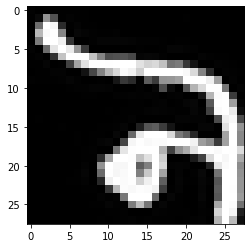

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

show_img = X_train[30829]
print(Y_train[30829])
plt.imshow(show_img, cmap='gray')

0


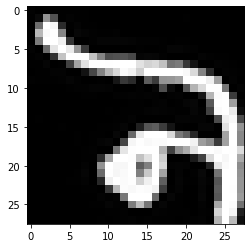

In [ ]:
show_img = train_dataset[30829][0]
print(train_dataset[30829][1])
plt.imshow(show_img, cmap='gray')

In [ ]:
print(torch.__version__)

print(torch.cuda.get_device_name())

1.7.0+cu101
Tesla T4


In [ ]:
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

##Step4# : Make Data Iterable

- We split the training set to 90% and test set to 10%. That means a 90:10 ratio. To split the data we have used **`torch.utils.data.sampler`** class.
- We will use the **DataLoader** class to make our dataset iterable. 

In [ ]:
import numpy as np
#batch size
batch_size = 45
#batch_size = 64  #100 #32
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_dataset)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:617
Test dataloader:69


##Step#4: Create the Model Class

In order to set up the model class, we need to initialize the model type and declare the forward pass. 

We initialize our model with this linear layer: **`torch.nn.Linear(input_size, num_classes)`** which
applies a linear transformation to the incoming data:  $y=W^T∗x+b$.

Parameters:

- input_size – size of each input sample (i.e. size of x)
- num_classes – size of each output sample (i.e. size of y)
- bias – If set to False, the layer will not learn an additive bias. Default: True

Next is to define the forward pass function. The forward pass refers to the calculation process of the output data from the input. The function takes x as its input and outputs the logits. 

We can simply apply **`functional.sigmoid`** to our current linear output from the forward pass: **`probas = functional.sigmoid(logits)`**. Probas will be the predicted Y.

Sigmoid is used because it is a binary-class classification for logistic regression.

The complete model class is defined below:


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.sigmoid(logits)
        return logits, probas

##Step#5:Instantiate the Model Class

####**Modelparameter:**
Model parameters are learned during training when we optimize a loss function using something like gradient descent.

####**Hyperparameter:**
Parameters which define the model architecture are referred to as hyperparameters. Hyperparameters are not model parameters and they cannot be directly trained from the data. 
These values are fixed before the training of the data begins. They deal with parameters such as learning_rate,num_iters etc.

- **learning_rate**: How quickly the model should be able to learn, how complicated the model is, and so on. 
- **num_iters**: It is used to specify the number of combinations that are randomly tried. If num_iters is too less, finding the best combination is difficult, and if num_iters is too large, the processing time increases. It is important to find a balanced value for ‘n_iter’.
  - **1 iteration**: One mini-batch forward & backward pass. That means a parameter (wights and biases) update. 
- **minibatch**:  Number of examples in 1 iteration
- **epochs**: How many times we are running the dataset

  - **1 epoch**: Running through the whole dataset once

Before instantiation, we’ll initialize some hyperparameters like following.

In [ ]:
# Hyperparameters

batch_size = 32
num_iters = 3000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.001
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Instantiating the model class and enabling GPU:

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''

model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=2, bias=True)
)

##Step#6: Construct loss and optimizer (select from PyTorch API)

We need Cross Entropy Loss to calculate our loss before we backpropagate and update our parameters.

`criterion = nn.CrossEntropyLoss() ` 

It does 2 things at the same time.

1. Computes softmax **([Logistic or Sigmoid]/softmax function)**
2. Computes Cross Entropy Loss

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

##Step #7 : Training: forward, loss, backward, step



- Calling `.backward()` mutiple times accumulates the gradient (**by addition**) for each parameter. 

- This is why you should call `optimizer.zero_grad()` after each .step() call. 

- Note that following the first `.backward` call, a second call is only possible after you have performed another **forward pass**.

- `optimizer.step` performs a parameter update based on the current gradient (**stored in .grad attribute of a parameter**)

Simplified equation:

- `parameters = parameters - learning_rate * parameters_gradients`
- parameters $W$ and $b$ in ($y = W^T * x + b$)
- $\theta = \theta - \eta \cdot \nabla_\theta$  [ General parameter $\theta$ ]
  *  $\theta$ : parameters (our variables)
  *  $\eta$ : learning rate (how fast we want to learn)
  *  $\nabla_\theta$ : parameters' gradients

###Setting1: Accuracy 57%
batch size =32 ,iteration=3000 learning rate= 0.001

In [ ]:
'''
TRAIN THE MODEL
'''
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

3


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.7067932486534119. Accuracy: 53.778786895880636
Iteration: 1000. Loss: 0.6821810007095337. Accuracy: 55.49789166396367
Iteration: 1500. Loss: 0.6817075610160828. Accuracy: 57.184560493026275
Iteration: 2000. Loss: 0.7540217041969299. Accuracy: 56.860201102821925
Iteration: 2500. Loss: 0.6924551129341125. Accuracy: 57.703535517353224


#### Plot of predicted and actual values

[0.7067932486534119, 0.6821810007095337, 0.6817075610160828, 0.7540217041969299, 0.6924551129341125]


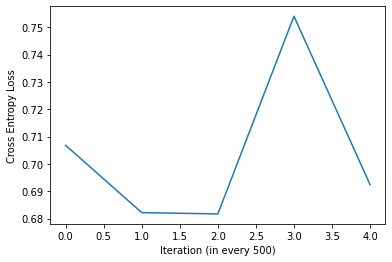

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

root_path = '/content/gdrive/My Drive/Soft Computing/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Problem2_setting1.pkl') 

####Loading Model

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Problem2_setting1.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


1 0 0 1 0 

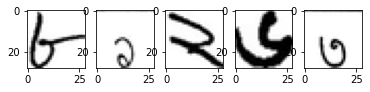

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
    print(labels[i].item(), end=" ")
plt.show()

In [ ]:
_, predictions = model.forward(images[:5].float().view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [1 0 1 1 1]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


###Setting2: Accuracy 59%

batch size =64 ,iteration=5000 learning rate= 0.01

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.01
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

10


In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.6770073175430298. Accuracy: 58.027894907557574
Iteration: 1000. Loss: 0.6590278148651123. Accuracy: 59.03340901719105
Iteration: 1500. Loss: 0.6904913783073425. Accuracy: 59.130716834252354
Iteration: 2000. Loss: 0.6732781529426575. Accuracy: 59.19558871229322
Iteration: 2500. Loss: 0.6369408369064331. Accuracy: 58.48199805384366
Iteration: 3000. Loss: 0.6884922385215759. Accuracy: 58.64417774894583
Iteration: 3500. Loss: 0.679256021976471. Accuracy: 58.83879338306844
Iteration: 4000. Loss: 0.6513882875442505. Accuracy: 59.68212779759974


#### Plot of predicted and actual values

[0.6770073175430298, 0.6590278148651123, 0.6904913783073425, 0.6732781529426575, 0.6369408369064331, 0.6884922385215759, 0.679256021976471, 0.6513882875442505]


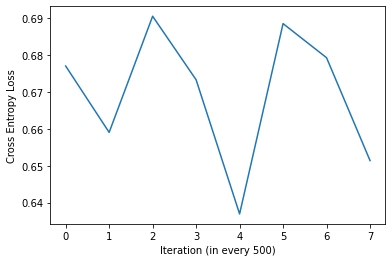

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [ ]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Problem2_setting3.pkl') 

####Loading Model

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Problem2_setting3.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


1 1 0 0 0 

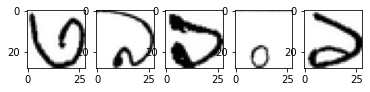

Predicted labels [1 0 1 0 1]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
    print(labels[i].item(), end=" ")
plt.show()

_, predictions = model.forward(images[:5].float().view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())


###Setting3: Accuracy 53%

batch size =64 ,iteration=5000 learning rate= 0.1

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 5000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.1
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

10


In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 1.5390543937683105. Accuracy: 49.95134609146935
Iteration: 1000. Loss: 0.6194883584976196. Accuracy: 55.49789166396367
Iteration: 1500. Loss: 0.8203584551811218. Accuracy: 56.98994485890366
Iteration: 2000. Loss: 1.0288782119750977. Accuracy: 50.04865390853065
Iteration: 2500. Loss: 0.9462570548057556. Accuracy: 54.459941615309766
Iteration: 3000. Loss: 1.594510793685913. Accuracy: 52.83814466428803
Iteration: 3500. Loss: 0.8500272035598755. Accuracy: 51.63801492053195
Iteration: 4000. Loss: 1.0007765293121338. Accuracy: 53.843658773921504


#### Plot of predicted and actual values

[1.5390543937683105, 0.6194883584976196, 0.8203584551811218, 1.0288782119750977, 0.9462570548057556, 1.594510793685913, 0.8500272035598755, 1.0007765293121338]


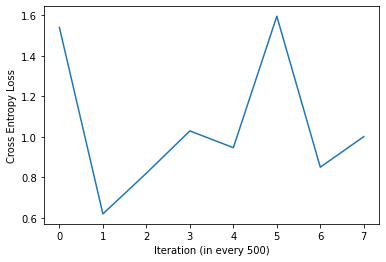

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [ ]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Problem2_setting4.pkl') 

####Loading Model

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Problem2_setting4.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


0 0 1 0 1 

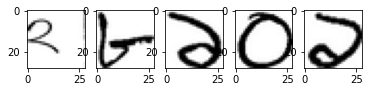

Predicted labels [0 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
    print(labels[i].item(), end=" ")
plt.show()

_, predictions = model.forward(images[:5].float().view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())


###Setting4: Accuracy 61%

batch size =64 ,iteration=15000 learning rate= 0.005

In [ ]:
# Hyperparameters

batch_size = 64
num_iters = 15000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.005
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

31


In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.7015732526779175. Accuracy: 59.19558871229322
Iteration: 1000. Loss: 0.6870052814483643. Accuracy: 60.13623094388583
Iteration: 1500. Loss: 0.6455302238464355. Accuracy: 60.655205968212776
Iteration: 2000. Loss: 0.6637232303619385. Accuracy: 60.52546221213104
Iteration: 2500. Loss: 0.656607985496521. Accuracy: 61.368796626662345
Iteration: 3000. Loss: 0.6251183152198792. Accuracy: 61.758027894907556
Iteration: 3500. Loss: 0.6639159321784973. Accuracy: 61.30392474862147
Iteration: 4000. Loss: 0.6767373085021973. Accuracy: 60.91469348037626
Iteration: 4500. Loss: 0.7041613459587097. Accuracy: 61.56341226078495
Iteration: 5000. Loss: 0.6218487620353699. Accuracy: 61.1417450535193
Iteration: 5500. Loss: 0.6463642716407776. Accuracy: 61.27148880960104
Iteration: 6000. Loss: 0.6395056247711182. Accuracy: 61.27148880960104
Iteration: 6500. Loss: 0.7125892043113708. Accuracy: 60.655205968212776
Iteration: 7000. Loss: 0.6528963446617126. Accuracy: 61.10930911449886
Itera

#### Plot of predicted and actual values

[0.7015732526779175, 0.6870052814483643, 0.6455302238464355, 0.6637232303619385, 0.656607985496521, 0.6251183152198792, 0.6639159321784973, 0.6767373085021973, 0.7041613459587097, 0.6218487620353699, 0.6463642716407776, 0.6395056247711182, 0.7125892043113708, 0.6528963446617126, 0.6360414624214172, 0.6207696199417114, 0.6201890110969543, 0.7130619287490845, 0.6814410090446472, 0.615215539932251, 0.722183108329773, 0.5876104235649109, 0.7261347770690918, 0.635308027267456, 0.6841755509376526, 0.6395684480667114]


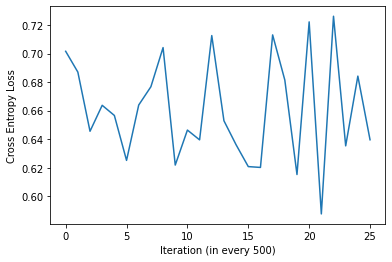

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [ ]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Problem2_setting5.pkl') 

####Loading Model

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Problem2_setting5.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


0 0 1 1 1 

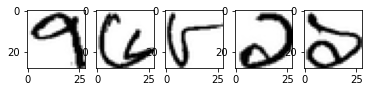

Predicted labels [1 1 0 1 1]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
    print(labels[i].item(), end=" ")
plt.show()

_, predictions = model.forward(images[:5].float().view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())


###Setting 5: Accuracy 59%

batch size =45 ,iteration=30000 learning rate= 0.003

In [ ]:
# Hyperparameters

batch_size = 45
num_iters = 30000
input_dim = 28*28 # num_features = 784
output_dim = 2

learning_rate = 0.003
# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
num_epochs = num_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

43


In [ ]:
'''
TRAIN THE MODEL
'''

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images.float()) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images.float())

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500. Loss: 0.6965036988258362. Accuracy: 56.53584171261758
Iteration: 1000. Loss: 0.6625569462776184. Accuracy: 58.44956211482322
Iteration: 1500. Loss: 0.6280111074447632. Accuracy: 58.41712617580279
Iteration: 2000. Loss: 0.7169215083122253. Accuracy: 58.806357444048004
Iteration: 2500. Loss: 0.6662015914916992. Accuracy: 57.541355822251056
Iteration: 3000. Loss: 0.6817439794540405. Accuracy: 59.29289652935452
Iteration: 3500. Loss: 0.6951663494110107. Accuracy: 57.184560493026275
Iteration: 4000. Loss: 0.7349054217338562. Accuracy: 59.098280895231916
Iteration: 4500. Loss: 0.6198273301124573. Accuracy: 58.44956211482322
Iteration: 5000. Loss: 0.6788696050643921. Accuracy: 59.130716834252354
Iteration: 5500. Loss: 0.6582098007202148. Accuracy: 58.41712617580279
Iteration: 6000. Loss: 0.6347125768661499. Accuracy: 58.96853713915018
Iteration: 6500. Loss: 0.6803419589996338. Accuracy: 58.93610120012974
Iteration: 7000. Loss: 0.6757638454437256. Accuracy: 59.552384041518
Iter

#### Plot of predicted and actual values

[0.6965036988258362, 0.6625569462776184, 0.6280111074447632, 0.7169215083122253, 0.6662015914916992, 0.6817439794540405, 0.6951663494110107, 0.7349054217338562, 0.6198273301124573, 0.6788696050643921, 0.6582098007202148, 0.6347125768661499, 0.6803419589996338, 0.6757638454437256, 0.6627194881439209, 0.6270051002502441, 0.6758269667625427, 0.6472546458244324, 0.655408501625061, 0.6598530411720276, 0.6003106236457825, 0.631123960018158, 0.6822812557220459, 0.6597292423248291, 0.7265877723693848, 0.6913778781890869, 0.7011781930923462, 0.6464442610740662, 0.6611277461051941, 0.6981314420700073, 0.6332213282585144, 0.6778411269187927, 0.6048191785812378, 0.7081245183944702, 0.6639847755432129, 0.6827055215835571, 0.7373683452606201, 0.6564409732818604, 0.6544684767723083, 0.662053644657135, 0.7088337540626526, 0.6604753136634827, 0.6634485721588135, 0.6687244772911072, 0.6388959884643555, 0.7057818174362183, 0.6836623549461365, 0.6853427290916443, 0.6792888045310974, 0.7446966171264648, 0.

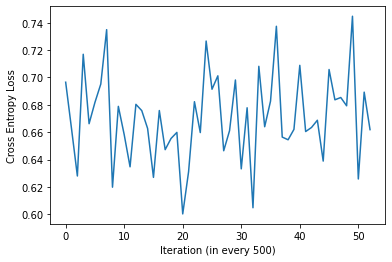

In [ ]:
print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

#### Saving Model to Directory

In [ ]:
import pickle
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), root_path + 'Problem2_setting6.pkl') 

In [ ]:
load_model = True

if load_model is True:
    model.load_state_dict(torch.load(root_path + 'Problem2_setting6.pkl'))
    print('Trained Model Loaded')

Trained Model Loaded


####Loading Model

0 0 1 0 1 

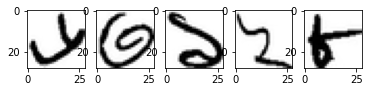

Predicted labels [0 1 0 0 1]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)
    print(labels[i].item(), end=" ")
plt.show()

_, predictions = model.forward(images[:5].float().view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())


##Analyzing the Tuning of Hyperparameters:


| Setting No.| Batch size | Dataset per batch | Iterations| Epochs| Learning rate    | Accuracy| Model (.pkl)|
| :-------------: | :----------: | :-----------: | :-------------: | :----------: | :-----------: | :-----------: | :-----------: |
| 01 | 32 | 965 |  3000 | 3 | 0.001   | 57%   |Problem2_setting1.pkl|
| 02 | 64 | 483 |  5000 | 10 | 0.01    | 59%   |Problem2_setting3.pkl|
| 03 | 64 | 483 |  5000 | 10 | 0.1    | 53%   |Problem2_setting4.pkl|
| 04 | 64 | 483 |  150000 | 31  | 0.005    | **61%** |Problem2_setting5.pkl|
| 05 | 45 | 766 |  30000 | 43 | 0.003   | 59%   |Problem2_setting6.pkl|




Here, we can see the best accuracy among 5 settings is **61%.** We can analyze this taking each parameter in comparison.

- **Analyzing according to learning rate:**


<div align="center">
<img src="https://drive.google.com/uc?id=1zh8NRAfiQcaQcjx1A3ebThWGBxPwmmfp" width="300">
</div>


For setting 1 and 2, we can see the more learning rate increases, the more accuracy increases. But after some point, in setting 3, accuracy starts to decrease again though learning increases. So, learning rate is decreased again, and got better accuracy in setting 4.

From this it is said that, A **learning rate** that is too **low** will take a long time to converge. Here, with 0.001 , accuracy is 57%. With more epochs and batch size, it may converge to a good result, but take too long time. If **learning rate** is too **large** (in this case it is 0.1), SGD jumps too far and misses the area near local minima. This would be extreme case of "under-fitting". Learning rate should be somewhere in between. For this situtation, it is at **0.005**.


- **Analyzing according to epochs:**

<div align="center">
<img src="https://drive.google.com/uc?id=1UJ1H4GVXfh-cIznpAfWUP6jPtwT355WX" width="300">
</div>

In general, the models improve with more epochs of training, to a point.Here comparing setting 2 and 4, with same batch size 64, by increasing epoch (decreasing learning rate) we get better accuracy. They'll start to plateau in accuracy as they converge. But, at some point we will see as the epoch increases , accuracy decreases. So, we can say it is dataset dependent. After going to global minima, it starts to decrease again.


- **Analyzing according to batch size and iterations:**


<div align="center">
<img src="https://drive.google.com/uc?id=1wZSQwzqtH34f2lxRPgxTutP0ZKIOUbCj" width="300">
</div>

In general, larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster.  In setting 1 and 2, and 5 and 4, larger batch size gives better acuracy.But in some cases, larger batch size can give lower accuracy. So, it's definitely problem dependent.



- **Analyzing the graphs of all the settings according to loss functions:**

<div align="center">
<img src="https://drive.google.com/uc?id=12MUtutE3KCQwLxarpNYxxi4uOFPEO5lr" width="800">
</div>



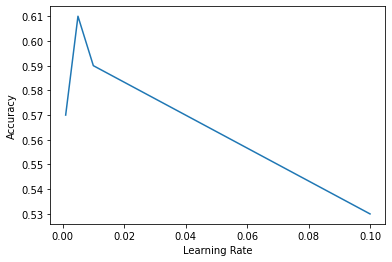

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
X=[0.001 ,0.003,0.005,0.01,0.1 ]
Y=[0.57,0.59,0.61,0.59,0.53]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.show()

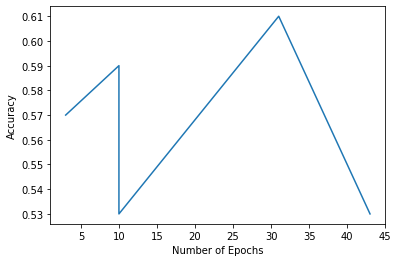

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
X=[3,10,10,31,43]
Y=[0.57,0.59,0.53,0.61,0.53]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()

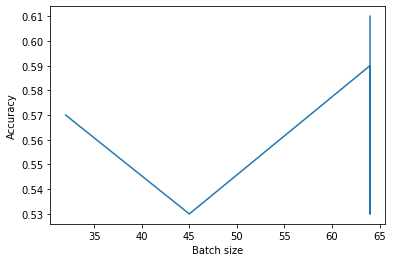

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
X=[32,45,64,64,64]
Y=[0.57,0.53,0.59,0.53,0.61]
plt.plot(X,Y)
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.show()